In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importing the dataset

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [6]:
df=pd.DataFrame(iris.data,columns= iris.feature_names)

In [7]:
df.shape

(150, 4)

In [8]:
df_target=pd.DataFrame(iris.target,columns=['target'])

In [9]:
df=pd.concat([df,df_target],axis=1)

In [10]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
45,4.8,3.0,1.4,0.3,0
135,7.7,3.0,6.1,2.3,2
68,6.2,2.2,4.5,1.5,1
82,5.8,2.7,3.9,1.2,1
20,5.4,3.4,1.7,0.2,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [12]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [14]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [15]:
df.duplicated().sum()

np.int64(1)

In [16]:
df=df.drop_duplicates()

In [17]:
df.shape

(149, 5)

In [18]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.118129,0.873738,0.820620,0.786971
sepal width (cm),-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal length (cm),0.873738,-0.426028,1.000000,0.962772,0.949402
petal width (cm),0.820620,-0.362894,0.962772,1.000000,0.956514
target,0.786971,-0.422987,0.949402,0.956514,1.000000


<Axes: xlabel='target', ylabel='count'>

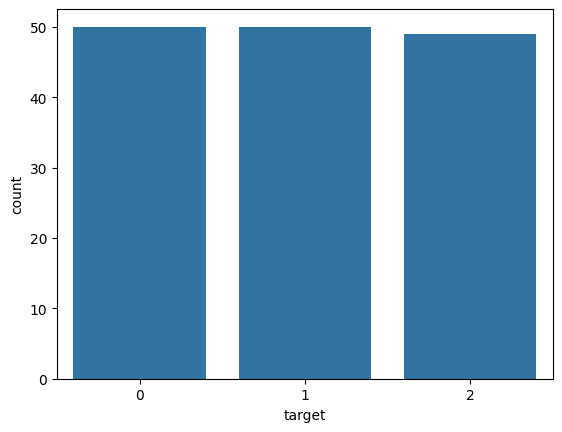

In [19]:
sns.countplot(x=df['target'])

<Axes: ylabel='count'>

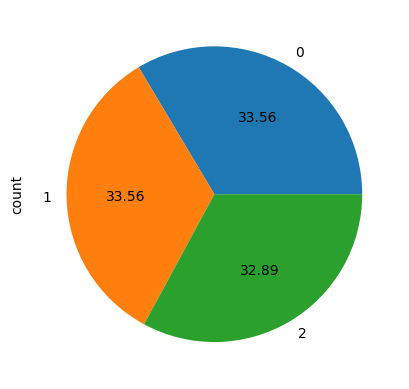

In [20]:
df.target.value_counts().plot(kind='pie',autopct='%.2f')

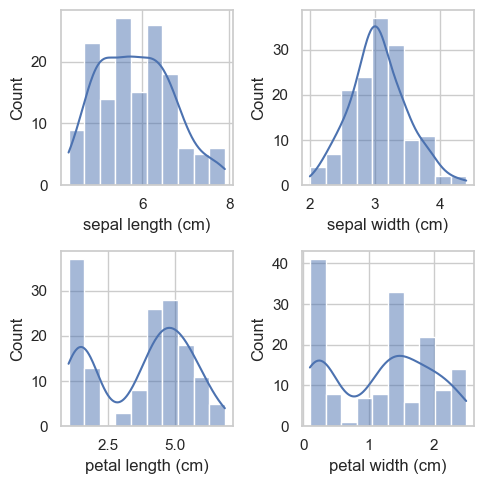

In [21]:
plt.figure(figsize=(5,5))
sns.set_theme(style ='whitegrid',palette = 'deep')

for i,col in enumerate(df.drop(columns=['target'])):
  plt.subplot(2,2,i+1)
  sns.histplot(df[col],kde=True,bins=10)

plt.tight_layout()
plt.show()

<Figure size 1200x1200 with 0 Axes>

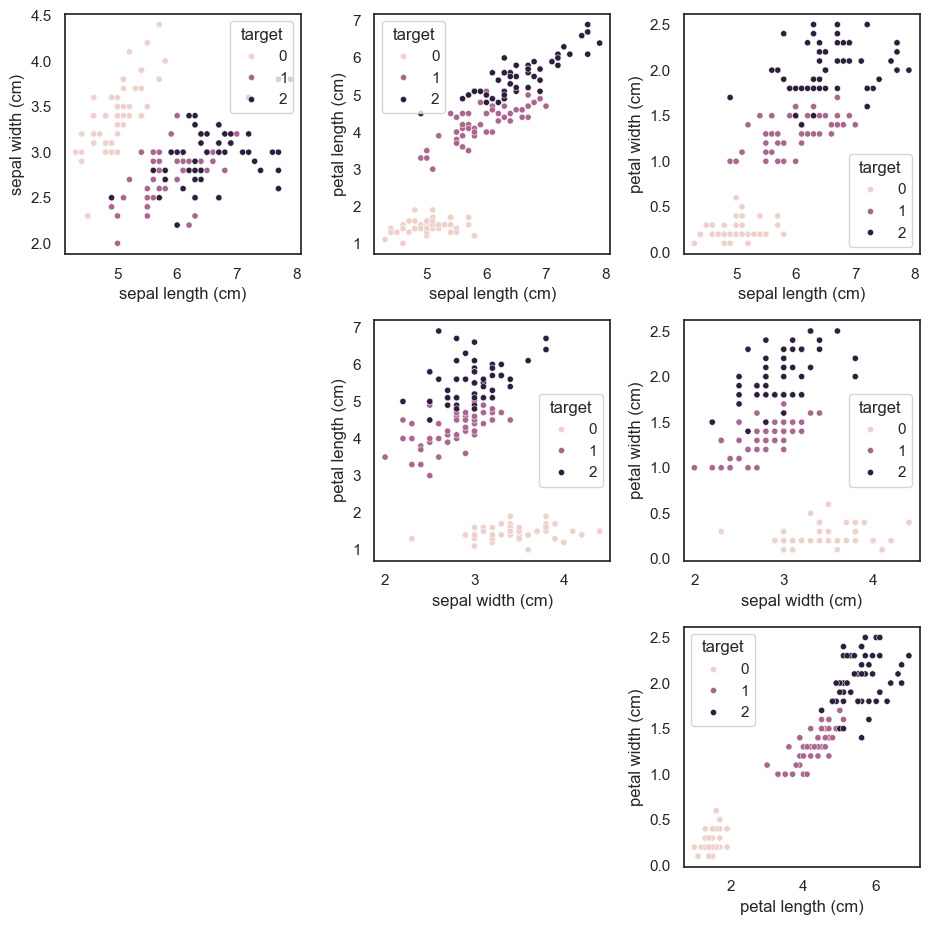

In [22]:
plt.figure(figsize=(12,12),dpi=100)
sns.set_theme(style='white',palette='Blues')

features = df.drop(columns=['target']).columns
num_features = len(features)

plt.figure(figsize=(12, 12))

for i, col in enumerate(features):
    for j, col2 in enumerate(features):
        if i < j:
            plt.subplot(num_features, num_features, i * num_features + j + 1)
            sns.scatterplot(x=df[col], y=df[col2], hue=df['target'], alpha=1, s=20)
            plt.xlabel(col)
            plt.ylabel(col2)

plt.tight_layout()
plt.show()


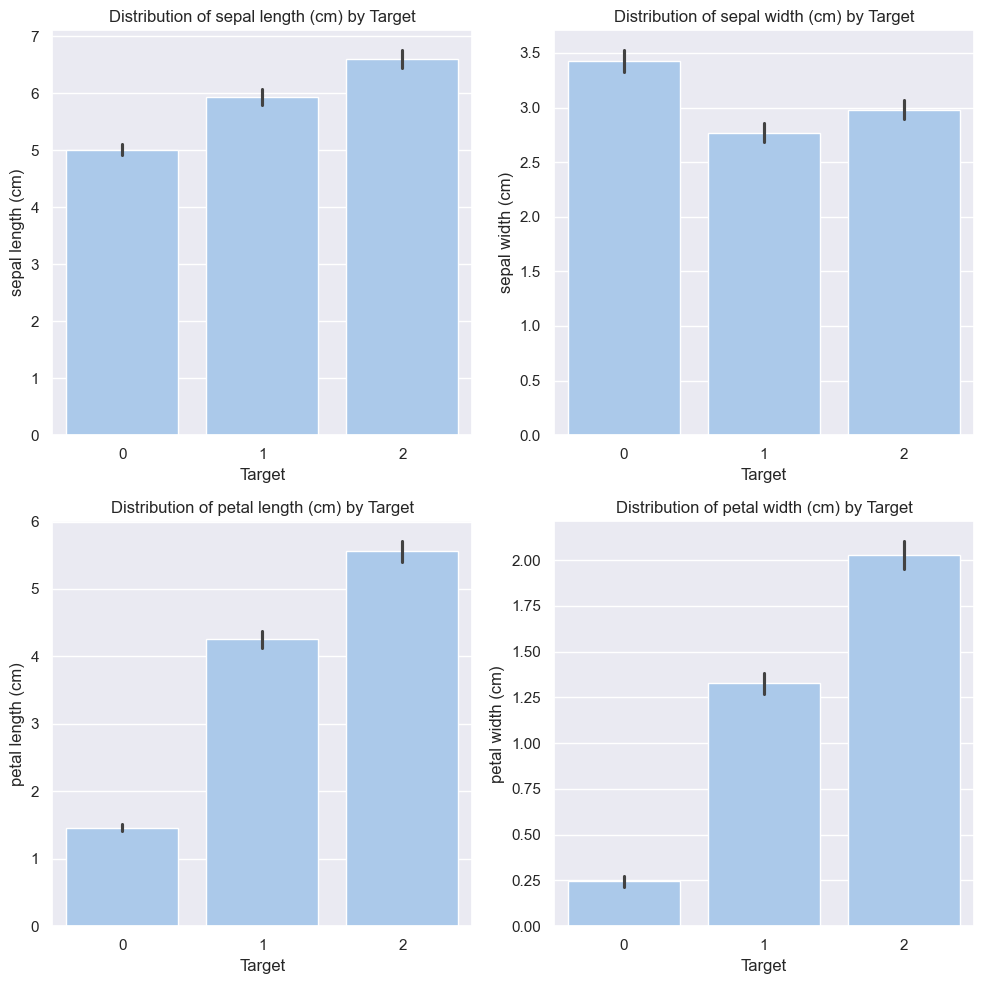

In [23]:
plt.figure(figsize=(10, 10), dpi=100)
sns.set_theme(palette="pastel")

for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x=df['target'], y=df[col], alpha=1)
    plt.xlabel('Target')
    plt.ylabel(col)
    plt.title(f'Distribution of {col} by Target')

plt.tight_layout()
plt.show()

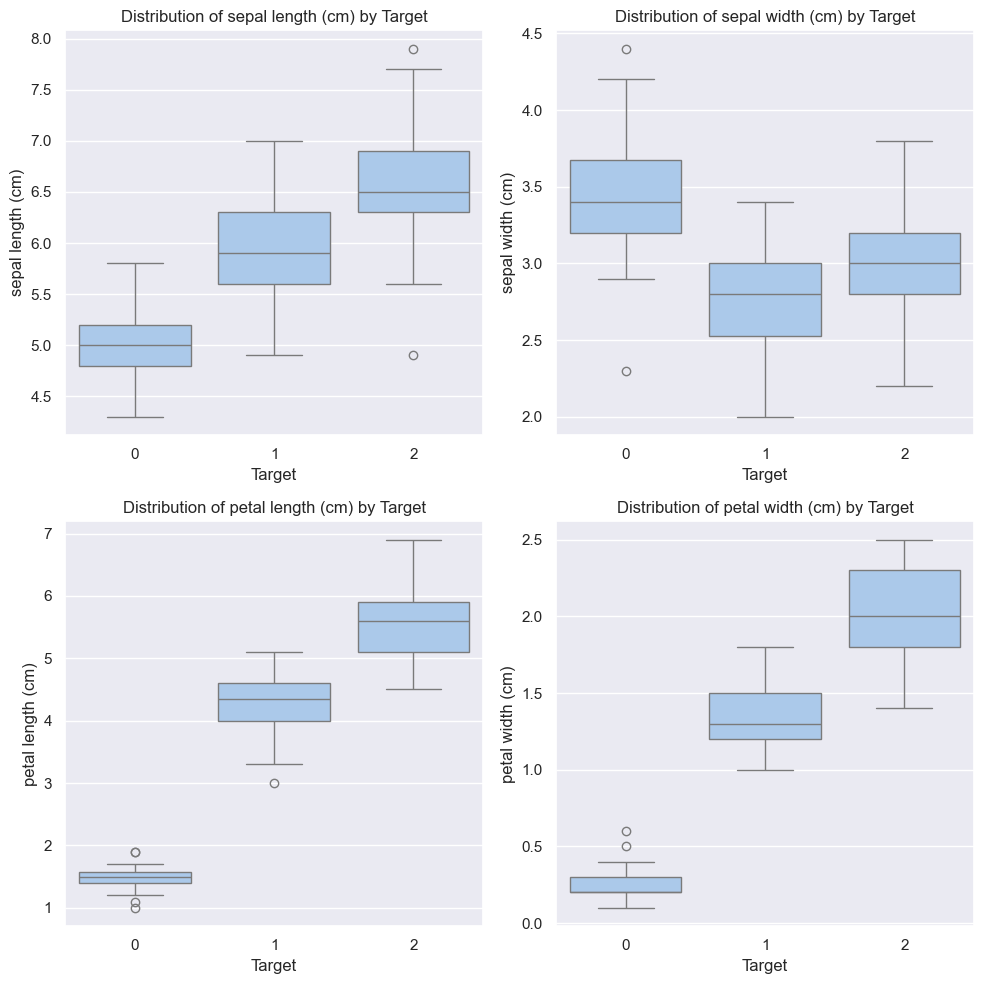

In [24]:
plt.figure(figsize=(10, 10), dpi=100)

for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df['target'], y=df[col])
    plt.xlabel('Target')
    plt.ylabel(col)
    plt.title(f'Distribution of {col} by Target')

plt.tight_layout()
plt.show()

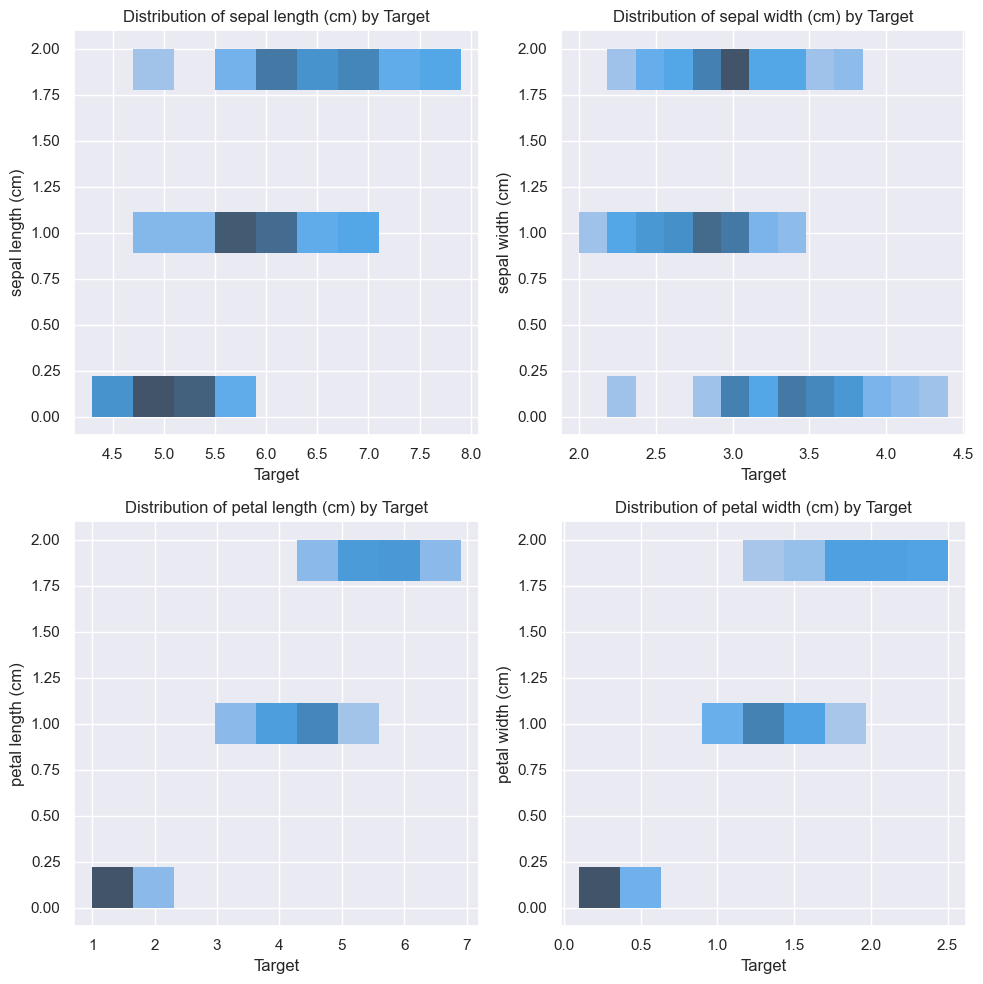

In [25]:
plt.figure(figsize=(10, 10), dpi=100)
sns.set_theme(palette="pastel")

for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(x=df[col], y=df['target'], alpha=1)
    plt.xlabel('Target')
    plt.ylabel(col)
    plt.title(f'Distribution of {col} by Target')

plt.tight_layout()
plt.show()

<Axes: >

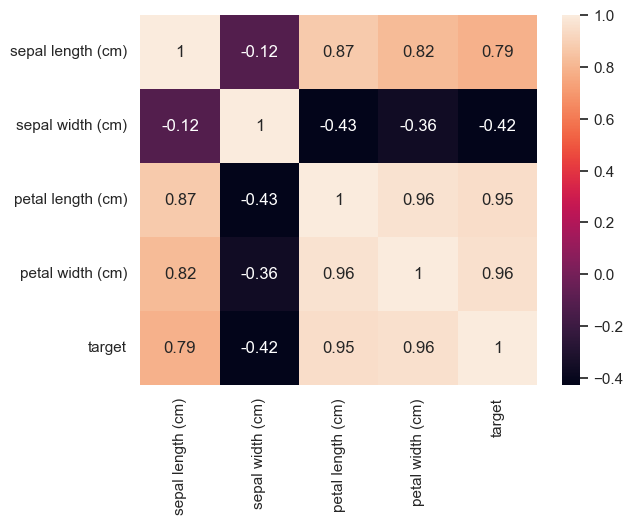

In [26]:
sns.heatmap(df.corr(),annot=True)

<Axes: ylabel='Density'>

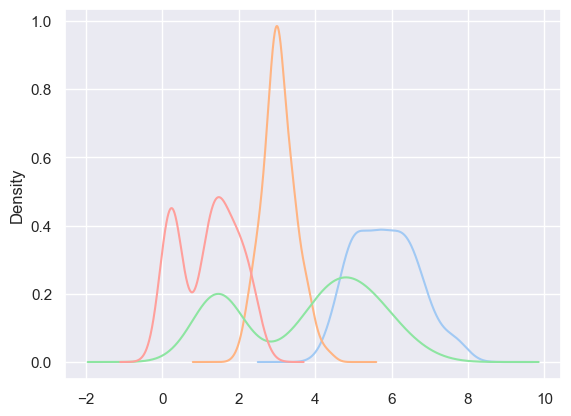

In [27]:
df['sepal length (cm)'].plot.density()
df['sepal width (cm)'].plot.density()
df['petal length (cm)'].plot.density()
df['petal width (cm)'].plot.density()

<Figure size 500x500 with 0 Axes>

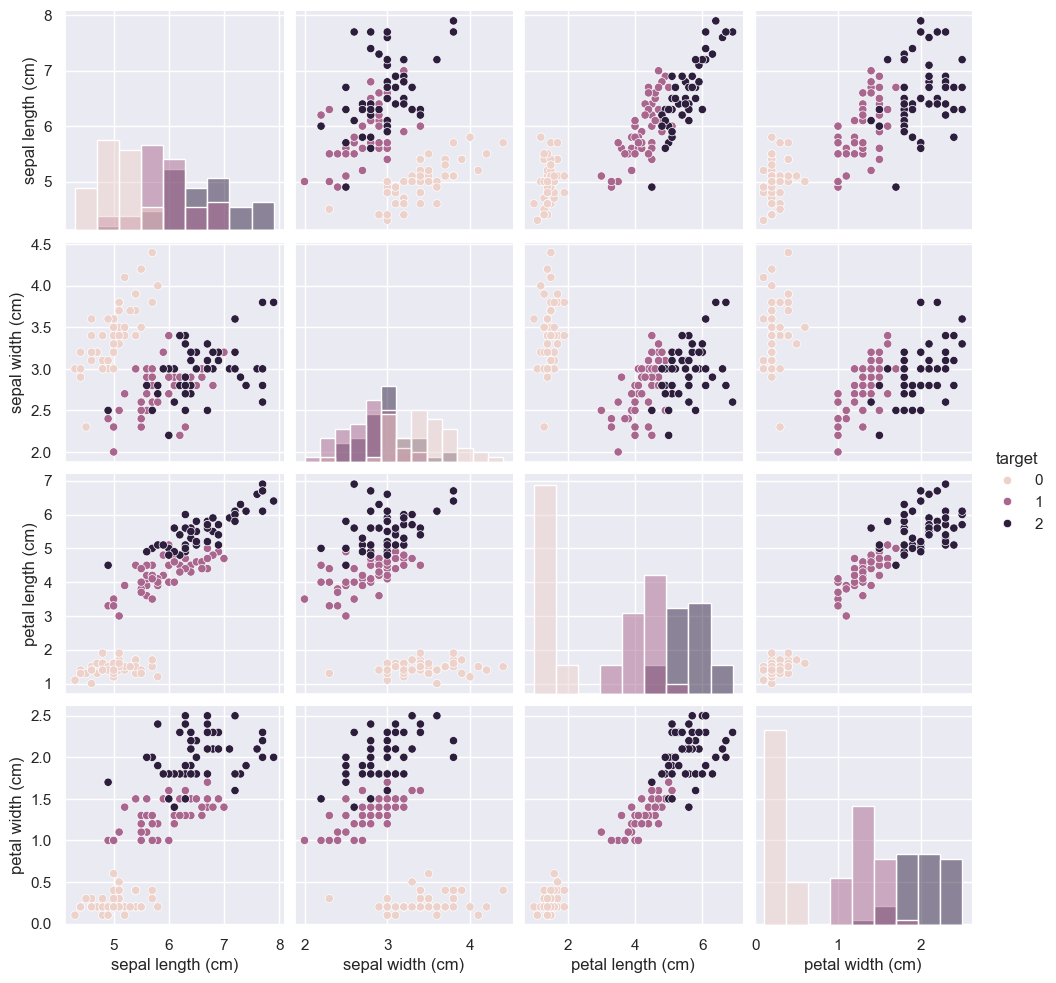

In [28]:
plt.figure(figsize=(5,5))

sns.pairplot(df,hue='target',diag_kind='hist')

<Axes: ylabel='count'>

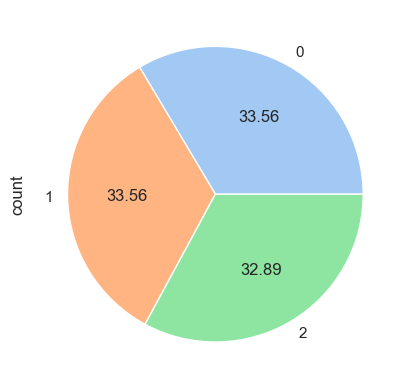

In [29]:
df.target.value_counts().plot(kind='pie',autopct='%.2f')

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [31]:
X=df.iloc[:,0:4]
y=df.target

In [32]:
X,y

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [149 rows x 4 columns],
 0      0
 1      0
 2   

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Decision tree classifier

In [34]:
dtc=DecisionTreeClassifier()

In [35]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
y_pred=dtc.predict(X_test)

In [37]:
y_pred_train = dtc.predict(X_train)

In [38]:
accuracy_test=accuracy_score(y_test,y_pred)

In [39]:
accuracy_train = accuracy_score(y_train, y_pred_train)

In [40]:
accuracy_test,accuracy_train

(1.0, 1.0)

Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf=RandomForestClassifier()

In [44]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
rf.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [46]:
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [47]:
accuracy_score(y_test,rf.predict(X_test))

1.0

KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn=KNeighborsClassifier()

In [52]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [53]:
accuracy_train=accuracy_score(y_train,knn.predict(X_train))
accuray_test=accuracy_score(y_test,knn.predict(X_test))

In [54]:
print(f"Training accuracy : {accuracy_train}")
print(f"Test accuracy : {accuracy_test}")

Training accuracy : 0.957983193277311
Test accuracy : 1.0


Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB

In [57]:
gnb=GaussianNB()

In [58]:
gnb.fit(X_train,y_train)

GaussianNB()

In [59]:
accuracy_test = accuracy_score(y_test,gnb.predict(X_test))
accuracy_train=accuracy_score(y_train,gnb.predict(X_train))

In [60]:
accuracy_test,accuracy_train

(1.0, 0.9495798319327731)

In [62]:
from sklearn.naive_bayes import MultinomialNB

In [63]:
mnb=MultinomialNB()

In [64]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [66]:
mnb.predict(X_test)

array([1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 1,
       0, 1, 2, 2, 1, 2, 0, 0])

In [68]:
accuracy_test = accuracy_score(y_test,mnb.predict(X_test))
accuracy_train = accuracy_score(y_train,mnb.predict(X_train))

In [69]:
accuracy_test,accuracy_train

(0.8333333333333334, 0.907563025210084)

In [71]:
import pickle

In [ ]:
models={"DecisionTreeClassifier":dtc,"RandomForestClassifier":rf,"KNN":knn,"NaiveBayes":gnb}

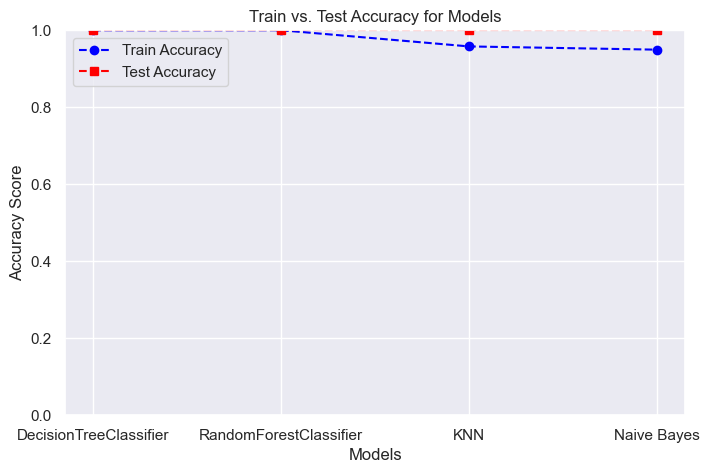

In [76]:


train_accuracies = []
test_accuracies = []
model_names = []

for name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    model_names.append(name)

plt.figure(figsize=(8, 5))
plt.plot(model_names, train_accuracies, marker="o", linestyle="--", label="Train Accuracy", color="blue")
plt.plot(model_names, test_accuracies, marker="s", linestyle="--", label="Test Accuracy", color="red")

plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Train vs. Test Accuracy for Models")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()


In [78]:
for name,model in models.items():
    pickle.dump(model,open(f"{name}.pkl",'wb'))